## Transfer Learning VGG16 - Tomato Dataset

In [44]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [45]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [46]:
IMAGE_SIZE +[3]

[224, 224, 3]

In [47]:
 #Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [48]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [49]:
# useful for getting number of output classes
folders = glob('train/*')

In [50]:
folders

['train\\NORMAL', 'train\\PNEUMONIA']

In [51]:
x = Flatten()(vgg16.output)

In [52]:
len(folders)

2

In [53]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [54]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [55]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [56]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [57]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [58]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [59]:
len(test_set)

20

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 20 steps
Epoch 1/20
163/163 [==============================] - 389s 2s/step - loss: 0.2029 - accuracy: 0.9185 - val_loss: 0.2351 - val_accuracy: 0.9167
Epoch 2/20
163/163 [==============================] - 401s 2s/step - loss: 0.1084 - accuracy: 0.9599 - val_loss: 0.3702 - val_accuracy: 0.8814
Epoch 3/20
163/163 [==============================] - 408s 3s/step - loss: 0.0989 - accuracy: 0.9640 - val_loss: 0.5271 - val_accuracy: 0.8494
Epoch 4/20
163/163 [==============================] - 557s 3s/step - loss: 0.0944 - accuracy: 0.9689 - val_loss: 0.2611 - val_accuracy: 0.9054
Epoch 5/20
163/163 [==============================] - 877s 5s/step - loss: 0.0800 - accuracy: 0.9741 - val_loss: 0.2727 - val_accuracy: 0.9119
Epoch 6/20
163/163 [==============================] - 777s 5s/step - loss: 0.0762 - accuracy: 0.9705 - val_loss: 0.4

In [18]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('lungs_disease.h5')

In [60]:
from tensorflow.keras.models import load_model
model = load_model('lungs_disease.h5')

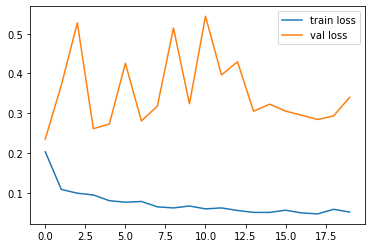

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

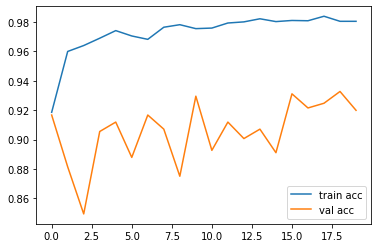

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# Prediction
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [61]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('val/NORMAL/NORMAL2-IM-1427-0001.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/block1_conv1/Conv2D (defined at <ipython-input-61-61d9326ed72c>:7) ]] [Op:__inference_distributed_function_6070]

Function call stack:
distributed_function


In [23]:
result

array([[0.9619621 , 0.03803781]], dtype=float32)

In [24]:
pred = np.argmax(result,axis=1)
pred

array([0], dtype=int64)

In [1]:
if pred==0:
    print("Normal")
else:
    print("Pneumonia!!")

NameError: name 'pred' is not defined